In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
x = np.linspace(-10, 10, 750)

In [3]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Activation Functions

## ReLU
$ReLU(x) = max(0,x)$

In [4]:
def relu(x: np.ndarray) -> np.ndarray:
    return (x > 0).astype("int32") * x

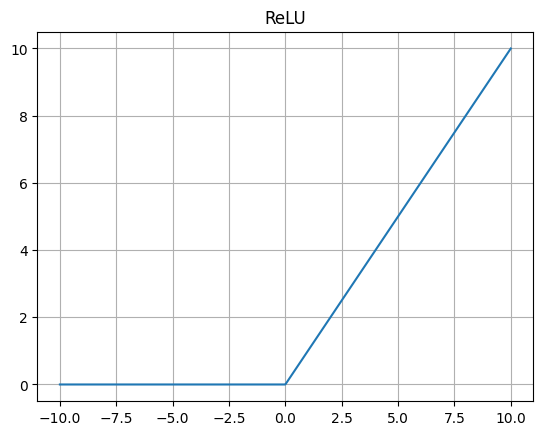

In [5]:
y = relu(x)
plt.title("ReLU")
plt.plot(x, y)
plt.grid()
plt.show()

## Derivative
$f(x)=\left\{\begin{array}{l}
1, x > 0 \\
0, x \leq 0
\end{array}\right.$

In [6]:
def relu_d(x: np.ndarray) -> np.ndarray:
    return (x > 0).astype("int32")

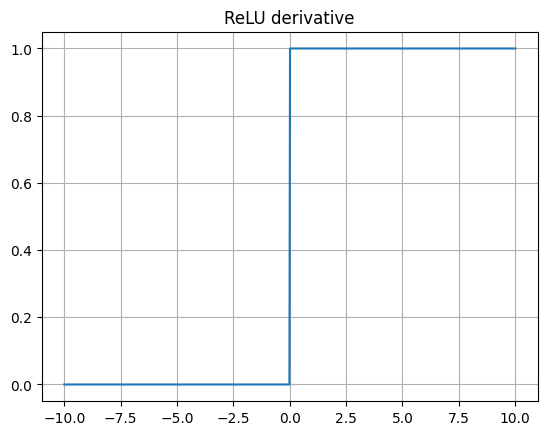

In [7]:
y = relu_d(x)
plt.title("ReLU derivative")
plt.plot(x, y)
plt.grid()
plt.show()

## ReLU6
$ReLU6(x) = min(max(0,x),6)$

In [8]:
def relu6(x: np.ndarray) -> np.ndarray:
    return (x > 0).astype("int32") * x - (x > 6).astype("int32") * (x - 6)

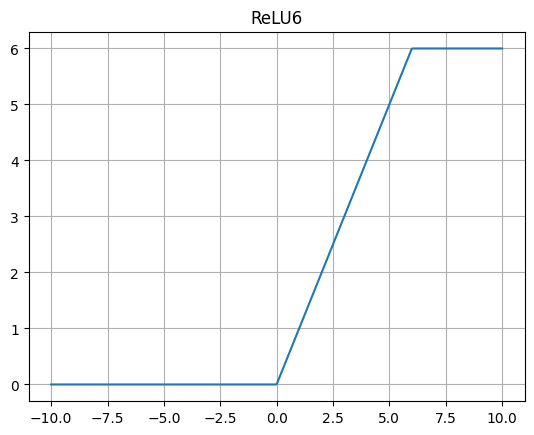

In [9]:
y = relu6(x)
plt.title("ReLU6")
plt.plot(x, y)
plt.grid()
plt.show()

### Derivative
$f(x)=\left\{\begin{array}{l}
0, x \leqslant 0 \\
0, x \geqslant 6 \\
1,0<x<6
\end{array}\right.$

In [10]:
def relu6_d(x: np.ndarray) -> np.ndarray:
    return np.logical_and(0 < x, x < 6).astype("int32")

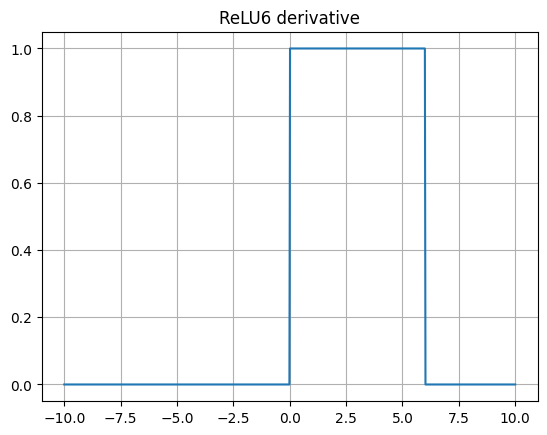

In [11]:
y = relu6_d(x)
plt.title("ReLU6 derivative")
plt.plot(x, y)
plt.grid()
plt.show()

## Mish
$\operatorname{Mish}(x)=x \cdot \tanh \left(\ln \left(1+e^x\right)\right)$

In [12]:
def mish(x: np.ndarray) -> np.ndarray:
    return x * np.tanh(np.log(1 + np.exp(x)))

In [13]:
# y = mish(x)
# plt.title("Mish")
# plt.plot(x, y)
# plt.grid()
# plt.show()

### Derivative
$\begin{aligned} & \operatorname{Mish}^{\prime}(x)=\frac{e^x \omega}{\delta^2}, \\ & \omega=4(x+1)+4 e^{2 x}+e^{3 x}+e^x(4 x+6), \\ & \delta=2 e^x+e^{2 x}+2\end{aligned}$

In [14]:
def mish_d(x):
    omega = 4*(x + 1) + 4*np.exp(2*x) + np.exp(3*x) + np.exp(x)*(4*x + 6)
    delta = 2*np.exp(x) + np.exp(2*x) + 2
    return np.exp(x) * omega / (delta ** 2)

In [15]:
# y = mish_d(x)
# plt.title("Mish derivative")
# plt.plot(x, y)
# plt.grid()
# plt.show()

## Swish
$\operatorname{Swish}(x)=x \cdot \sigma(x), \sigma(x)=\frac{1}{1+e^{-x}}$

In [16]:
def swish(x: np.ndarray) -> np.ndarray:
    return x * sigmoid(x)

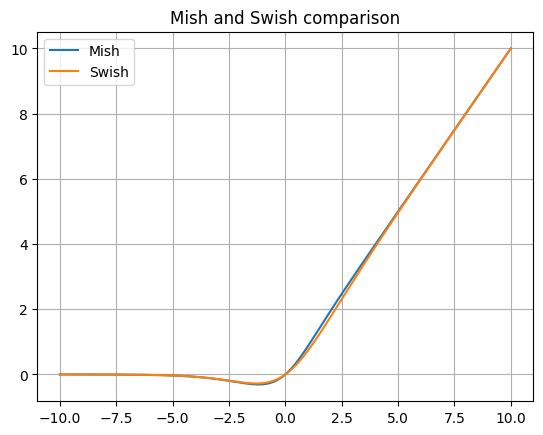

In [17]:
y1 = mish(x)
y = swish(x)
plt.title("Mish and Swish comparison")
plt.plot(x, y1)
plt.plot(x, y)
plt.legend(["Mish", "Swish"])
plt.grid()
plt.show()

### Derivative
$\operatorname{Swish}^{\prime}(x)=\operatorname{Swish}(x)+\sigma(x)(1-\operatorname{Swish}(x))$

In [18]:
def swish_d(x: np.ndarray) -> np.ndarray:
    return swish(x) + sigmoid(x) * (1 - swish(x))

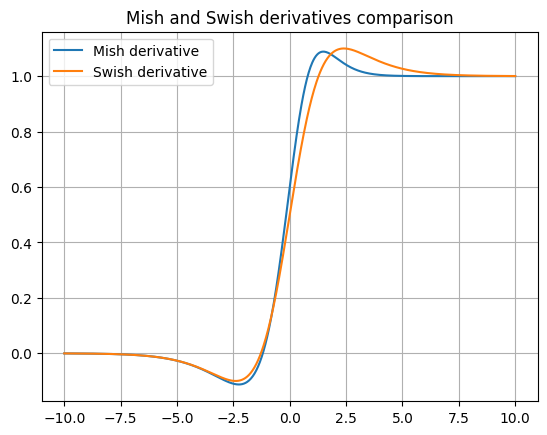

In [19]:
y1 = mish_d(x)
y = swish_d(x)
plt.title("Mish and Swish derivatives comparison")
plt.plot(x, y1)
plt.plot(x, y)
plt.legend(["Mish derivative", "Swish derivative"])
plt.grid()
plt.show()

## Softplus
$\operatorname{Softplus}(x)=\ln (1+e^x)$

In [20]:
def softplus(n: np.ndarray) -> np.ndarray:
    return np.log(1 + np.exp(x))

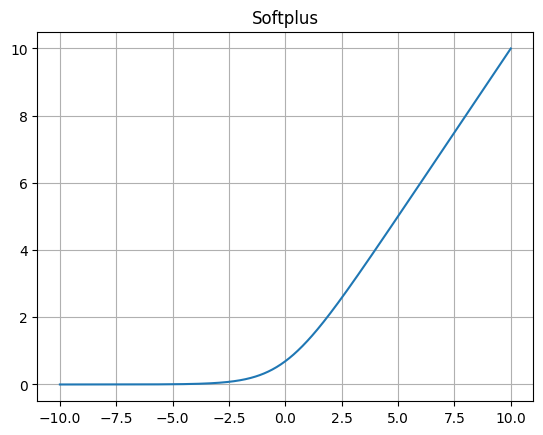

In [21]:
y = softplus(x)
plt.title("Softplus")
plt.plot(x, y)
plt.grid()
plt.show()

### Derivative
$\operatorname{Softplus}^{\prime}(x)=\sigma(x)=\frac{1}{1+e^{-x}}$

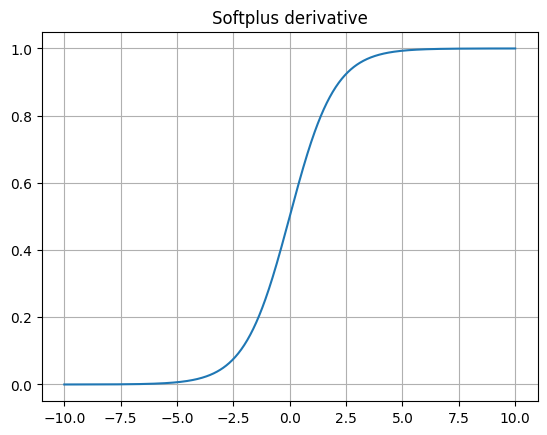

In [22]:
y = sigmoid(x)
plt.title("Softplus derivative")
plt.plot(x, y)
plt.grid()
plt.show()

# Loss Functions

In [23]:
y1 = np.linspace(-2, 2, 1000)
y2 = np.linspace(-1, 1, 1000)

## SmoothL1
$
SmoothL1= \begin{cases}\frac{0.5(y_{1}-y_{2})^2}{\beta}, & |y_{1}-y_{2}|<\beta \\ |y_{1}-y_{2}|-0.5 \cdot \beta, & |y_{1}-y_{2}| \geq \beta\end{cases}$

In [24]:
def SmoothL1(y_valid, y_pred, b=0.5):
    difference = np.abs(y_valid - y_pred)
    return np.where(difference < b, 0.5*(difference**2)/b, difference - 0.5*b)

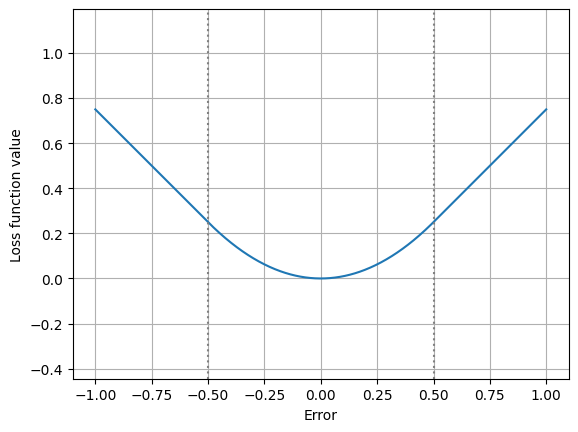

In [25]:
beta = 0.5
plt.plot(y1 - y2, SmoothL1(y1, y2, beta))
plt.axis('equal')
plt.axvline(x=beta, linestyle='dotted', color='gray')
plt.axvline(x=-beta, linestyle='dotted', color='gray')
plt.xlabel('Error')
plt.ylabel('Loss function value')
plt.grid()
plt.show()

## L1
$L1 = |y_{1} - y_{2}|$

In [26]:
def L1(y_valid, y_pred):
    difference = np.abs(y_valid - y_pred)
    return difference

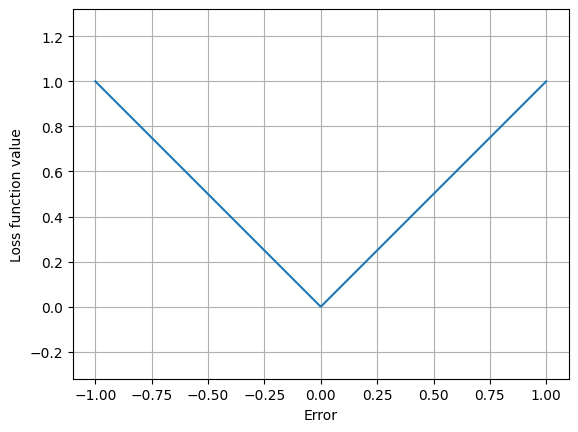

In [27]:
plt.plot(y1 - y2, L1(y1, y2))
plt.axis('equal')
plt.xlabel('Error')
plt.ylabel('Loss function value')
plt.grid()
plt.show()

## Huber
<!-- $SmoothL1= \begin{cases}\frac{0.5(y_{1}-y_{2})^2}{\beta}, & |y_{1}-y_{2}|<\beta \\ |y_{1}-y_{2}|-0.5 \cdot \beta, & |y_{1}-y_{2}| \geqslant \beta\end{cases}$ -->
$Huber= \begin{cases} \frac{1}{2} (y_{1}-y_{2})^2, & |y_{1}-y_{2}| \leq \delta \\ \delta|y_{1}-y_{2}|-\frac{1}{2} \delta^2, & |y_{1}-y_{2}|>\delta\end{cases}$

In [28]:
def Huber(y_valid, y_pred, delta=0.5):
    difference = np.abs(y_valid - y_pred)
    return np.where(difference <= delta, 0.5 * difference**2, delta * difference - 0.5 * delta**2)

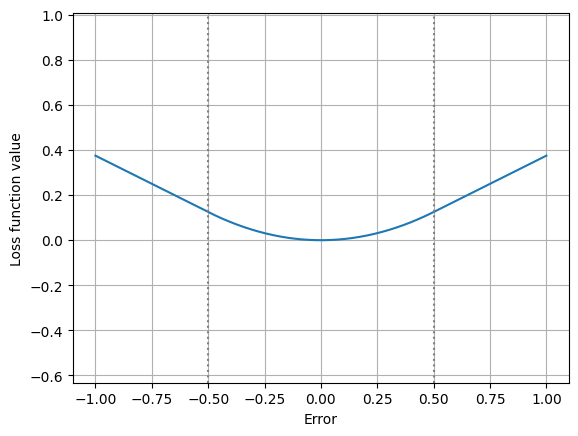

In [29]:
delta = 0.5
plt.plot(y1 - y2, Huber(y1, y2, delta))
plt.axis('equal')
plt.axvline(x=delta, linestyle='dotted', color='gray')
plt.axvline(x=-delta, linestyle='dotted', color='gray')
plt.xlabel('Error')
plt.ylabel('Loss function value')
plt.grid()
plt.show()

## All of them combined

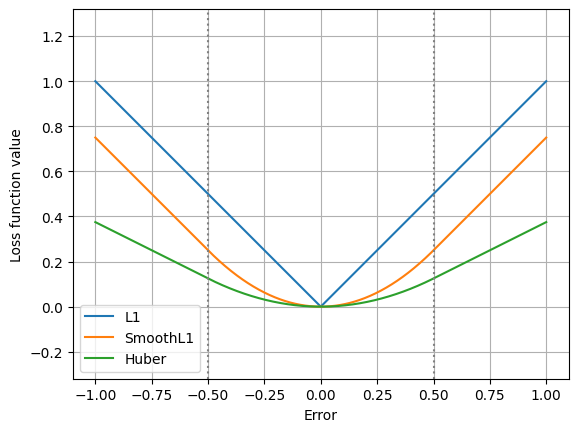

In [30]:
val = 0.5
plt.plot(y1 - y2, L1(y1, y2))
plt.plot(y1 - y2, SmoothL1(y1, y2, beta))
plt.plot(y1 - y2, Huber(y1, y2))
plt.axis('equal')
plt.axvline(x=val, linestyle='dotted', color='gray')
plt.axvline(x=-val, linestyle='dotted', color='gray')
plt.xlabel('Error')
plt.ylabel('Loss function value')
plt.legend(["L1", "SmoothL1", "Huber"])
plt.grid()
plt.show()